In [2]:
from qutip import *
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


c:\Users\1163080609\anaconda3\Lib\site-packages\qutip\__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


In [3]:
    ###############################################
    def fit_w_mat(self,input,target=None,plot=False):
        '''for rabi'''
        if target==None:
            target=self.rho0+1
        x,z=input[4],input[0]
        y=np.transpose(z[target][-1])
        if self.rho0==0:
            d_guess=2*(self.amp*self.ks)**2*self.yita[0]*self.g[0]/self.ee[1]
            guess=[5.927+0*self.ee[4]/2,d_guess,1,self.L-self.tupdown]
            print(guess)
        else :
            d_guess=8*(self.amp*self.kp)**2*self.yita[0]*self.g[0]/self.ee[1],
            guess=[(self.ee[self.s22]-self.ee[4])/2,d_guess,1,self.L]
            print(guess)
        def func(x,wm,d,F,t):
            # F=2
            # wm=5.928
            # return 0.5*(1/(1+((x-b)/d)**2))*(1-0*np.cos(t*(1+((x-b/d)**2))))
            # return np.abs(1/(1+(x-b)**2))
            # return F*1/(((x-wm)/d)**2+1)#*(0.5*(1-np.cos(t*np.sqrt(d**2+(x-wm)**2))))
            return F*1/(((x-5.927)/d)**2+1)#*(0.5*(1-np.cos(t*np.sqrt(d**2+(x-wm)**2))))
        
        # 拟合数据
        coeff, var_matrix = curve_fit(func,x,y,guess,\
            bounds=([self.ee[1],d_guess*0.5,0,0],[self.ee[2],d_guess*2,1,1000]))
 
        # 输出拟合参数
        
        if plot==True:
            print(f"wm,d,f,t: {coeff}")#, D/2pi: {coeff[1]}")
            plt.scatter(x, y)
            plt.plot(x, func(x,*coeff),color='red')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.title('Linear Fit')
            plt.show()

        return 0



In [4]:
class optimize:
    '''optimize of gate parameters and visualize
    func_targ(result) --> value
    '''
    def __init__(self,name,start,step_start,step_m,dpi,gateclass,func_targ):
        self.name=name
        self.start,self.step,self.step_m,self.dpi=start,step_start,step_m,dpi
        self.gate,self.func=gateclass,func_targ
        self.dict_p={name:start}
    
    def opti_process(self,plot=True):
        name,gate,dic=self.name,self.gate,self.dict_p
        step,step_m,dpi=self.step,self.step_m,self.dpi
        para0=gate.params
        
        plist,expect_list=[],[]
        #确定范围
        while step>=dpi: 
            gate.params.update(dic)
            result=gate.run()
        result


    def imshow(self):

        plt.imshow(z[target],extent=[0,stop-start,self.tlist[-1],self.tlist[0]],\
        aspect=(wstop-wstart)/(self.tlist[-1]-self.tlist[0]),interpolation='none')
        plt.colorbar()
        plt.show()


In [19]:


class sideband:
    def __init__(self,**params) -> None:
        '''
        (w+k)n-k/12(x**4)=wn-k/2*ad*ad*a*a
        '''

        self.params={
        # 'w':[6.8112,4.0755,0],
        # 'yita':[137.4,0.348*0.348/137.4],
        # 'g':[10,0,0],
        'level':3,
        'hascoupler':False,
        'w':[7,5,0],
        'yita':[100,300,0],
        'g':[100,0,0],
        'wd':[lambda t,args:5.15,\
              lambda t,args:6],
        'phid':[0,0],
        'L':100,
        'tupdown':1,
        'amp':10,
        'TStep':100,
        'shift':[0,0,0],
        'pshift':[0,0,0],
        'ps':None,
        'sp':[1,0],
        'rho0':0
        }
        self.params.update(params)
        self.__setparams(self.params)
    
    def __setparams(self,dic):
        for p in dic:
            setattr(self,p,dic[p])
        
        global n
        n=self.level
        self.w=[w*2*np.pi for w in self.w]
        self.yita=[yita*2*np.pi*0.001 for yita in self.yita]
        self.g=[g*2*np.pi*0.001 for g in self.g]
        self.tlist=np.linspace(0,self.L,self.TStep)

        self.envelope=lambda t,args:\
        self.amp*(0.5*np.cos(np.pi*t/self.tupdown-np.pi)+0.5)\
        if 0<=t<=self.tupdown else\
        self.amp*(0.5*np.cos(np.pi*(t-self.L)/self.tupdown-np.pi)+0.5)\
        if (self.L-self.tupdown)<=t<=self.L else\
        self.amp\
        if self.tupdown<t<(self.L-self.tupdown) else 0


        self.H0=self.__H0
        self.ee,self.es,self.s22=self.__eigen
        self.ks,self.kp,self.sp=self.__sp
        self.Drive=self.__Drive
        self.DS=self.__DS

        # self.sp=[self.sp[0],10*self.sp[1]]

    def update(self,**params):
        self.params.update(params)
        self.__setparams(self.params)
        
    @property 
    def __sp(self):
        sp=self.sp
        if self.ps!=None:
            sp=[1,self.ps]
        if len(self.wd)>=2:
            ks=1/(self.ee[2]-self.wd[0](0,0))+1/(self.ee[2]+self.wd[0](0,0))
            kp=1/(self.ee[2]-self.wd[1](0,0))+1/(self.ee[2]+self.wd[1](0,0))
            spp=[sp[0],np.sqrt(0.5*sp[1])*np.abs(ks/kp)]
        return ks,kp,spp

    @property
    def __DS(self):
        DS=lambda t,args:0
        def cos(sp,a,w,phi): 
            return lambda t,args:sp*2*np.pi*a(t,args)*np.cos(2*np.pi*w(t,args)*t+phi)
        def add(f1,f2):
            return lambda t,args:f1(t,args)+f2(t,args)

        if type(self.wd)!=list:
            DS=add(cos(1,self.envelope,self.wd,self.phi),DS)
        else:
            i=0
            for i in list(range(len(self.wd))):
                DS=add(cos(self.sp[i],self.envelope,self.wd[i],self.phid[i]),DS)
        return DS

    @property
    def __Drive(self):
        a=destroy(n)
        ad=create(n)
        I=qeye(n)
        if self.hascoupler:
            pass
        else:
            DS=self.__DS
            D=tensor(a+ad,I)
            return [D,DS]        
        
    @property
    def __H0(self):
        w,g,yita=self.w,self.g,self.yita
        a=destroy(15)
        ad=create(15)
        I=qeye(15)
        x=a+ad
        def trunc(x):
            return Qobj(x[:n,:n])
        if self.hascoupler:
            pass
        else:
            # h0=(w[0]+yita[0])*ad*a-yita[0]/12*(ad+a)**4
            h0=(w[0]+yita[0])*ad*a-yita[0]/12*(x**4)
            # h1=(w[1]+yita[1])*ad*a-yita[1]/12*(ad+a)**4
            h1=(w[1]+yita[1])*ad*a-yita[1]/12*(x**4)
            G01=g[0]*tensor(trunc(x),trunc(x))
            H0=tensor(trunc(h0),trunc(I))+tensor(trunc(I),trunc(h1))+G01
            return H0 
            # return trunc(h0)

    @property
    def __eigen(self):
        eigen=self.H0.eigenstates()
        ee=[(e-eigen[0][0])/2/np.pi for e in eigen[0]]
        es=eigen[1]
        if n==3:
            s22=8
        elif n==4:
            s22=11
        elif n==5:
            s22=12
        elif n>=6:
            s22=13

        return ee,es,s22  

    def GateProcess(self,result,p):
        tot=[]
        for i in list(range(len(result.expect[0]))):
            tot.append(
            result.expect[0][i]+result.expect[1][i]+result.expect[2][i]
            )
        fig, ax = plt.subplots()
        ax.plot(result.times ,
            # np.transpose([result.expect[p]]))
            np.transpose([result.expect[0],result.expect[1],result.expect[2],tot]))
        ax.set_xlabel('t/ns')
        ax.set_ylabel('Population')
        ax.legend(('P'))
        plt.show()
        b=qutip.Bloch()
        b.add_points([result.expect[0],result.expect[1],result.expect[2]])#,'l')
        b.show()
        return
    
    def energyLevel(self,target=None,g=None):
        if g==None:
            g=self.g[0]*1000/2/np.pi
        z=[]
        glist=np.linspace(0,g,100)
        for p in glist:
            self.update(g=[p,0,0])
            ee=[e/2/np.pi for e in self.ee]
            ee=[e-ee[0] for e in ee]
            # z.append(ee[2]-ee[1]-2)
            z.append(ee)
        z=np.transpose(z)
        fix,ax=plt.subplots()
        if target==None:
            target=4
            ax.plot(glist,np.transpose(z))
        else:
            # ax.plot(glist,np.transpose(z)[target])
            ax.plot(glist,[i-0*z[target][0] for i in z[target]])
        return z[target][-1]-z[0][-1]
        # return z[target][0]-z[0][0]
        

    def run(self,rho0=None,target=0,plot=False):
        if rho0==None:
            rho0=self.rho0
        es,s22=self.es,self.s22
        proj=[s*s.dag() for s in es]
        #n=3,4,5 p22=p[8,11,12] ,assume 11,22 setten at middle of exciting number subspace
        #without consider 30 exceed 04
        #assume w2=2w-yita,w3=3w-2yita

        if rho0==0:
            p=0
        elif rho0==1:
            p=4
        elif rho0==2:
            p=s22
        rho0=proj[p]
        tlist=self.tlist
        result=mesolve([self.H0,self.Drive],rho0,tlist,e_ops=[proj[0],proj[4],proj[s22]])
        if plot:
            self.GateProcess(result=result,p=target)
        return result
        
    def scan_wd(self,wstart,wstop,wstep,sp=-1,rho0=0,target=None,plot=True):
        if target==None:
            target=1+rho0
        wdlist=np.linspace(wstart,wstop,wstep)
        ws,wp=self.wd[0](0,0),self.wd[1](0,0)
        z=[]
        if sp==0 or sp==-1:
            for wd in wdlist:
                wdt=[lambda t,args:wd,lambda t,args:wp]
                # wdt=[lambda t,args:wd]
                self.update(wd=wdt)
                result=self.run(rho0=rho0)
                z.append(np.transpose(result.expect))
        elif sp==1:
            for wd in wdlist:
                wdt=[lambda t,args:ws,lambda t,args:wd]
                # wdt=[lambda t,args:wd]
                self.update(wd=wdt)
                result=self.run(rho0=rho0)
                z.append(np.transpose(result.expect))

        z=np.transpose(z)
        # print(shape(z))

        if plot:
            self.imshow([z,wstart,wstop,wstep],rho0+1)

        return [z,wstart,wstop,wstep,wdlist]
    


    ###############################################

    ###############################################
    def fit_w_mat(self,input,target=None,plot=False):
        '''for rabi'''
        if target==None:
            target=self.rho0+1
        x,z=input[4],input[0]
        y=np.transpose(z[target][-1])
        if self.rho0==0:
            d_guess=2*((self.amp*self.ks)**2)*\
                self.yita[0]*self.g[0]/self.ee[2]/((2*np.pi)**2)
            wm_guess=self.ee[4]/2
            guess=[wm_guess,d_guess,1,self.L-self.tupdown]
            print(guess)
        else :
            d_guess=8*((self.amp*self.kp)**2)*\
                self.yita[0]*self.g[0]/self.ee[2]/(2*np.pi),
            wm_guess=(self.ee[self.s22]-self.ee[4])/2
            guess=[wm_guess,d_guess,1,self.L-self.tupdown]
            print(guess)

        def func(x,wm,d,F,t):
            # F=2
            # wm=5.928
            # d=0.004
            # t=150
            # wm=5.927
            # return F*1/(((x-wm)/d)**2+1)#*(0.5*(1-np.cos(t*np.sqrt(d**2+(x-wm)**2))))
            return F*1/(((x-wm)/d)**2+1)*(0.5*(1-np.cos(2*np.pi*t*np.sqrt(d**2+(x-wm)**2))))
        
        # 拟合数据
        coeff, var_matrix = curve_fit(func,x,y,guess,\
            bounds=([wm_guess-0.1,d_guess*0.6,0,0*(self.L-5*self.tupdown)],\
                    [wm_guess+0.1,d_guess*1.5,1.0,1000+0*(self.L+5*self.tupdown)]))
 
        # 输出拟合参数
        
        if plot==True:
            print(f"wm,d,f,t: {coeff}")#, D/2pi: {coeff[1]}")
            plt.scatter(x, y)
            plt.plot(x, func(x,*coeff),color='red')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.title('Linear Fit')
            plt.show()

        return coeff

    def auto_scan_scope(self,sp=0):
        ws=self.ee[4]/2
        wp=(self.ee[self.s22]-self.ee[4])/2
        dw=self.ee[2]-self.ee[1]
        if sp==0:
            input=self.scan_wd(ws-dw/20,ws+dw/20,10,sp=sp,rho0=self.rho0,plot=False)
            coeff=self.fit_w_mat(input=input,plot=True)
            ws1=coeff[0]
            print(f'({ws-dw/20},{ws+dw/20})',)
            input1=self.scan_wd(ws1-dw/100,ws1+dw/100,10,sp=sp,rho0=self.rho0,plot=False)
            coeff2=self.fit_w_mat(input=input1,plot=True)

        
        
    def imshow(self,input,target=1):
        z,wstart,wstop,wstep=input[0],input[1],input[2],input[3]
        # print(shape(z))
        # plt.imshow(z[target],extent=[wstart,wstop,self.tlist[-1],self.tlist[0]],\
        # aspect=(wstop-wstart)/(self.tlist[-1]-self.tlist[0]),interpolation='none')
        plt.imshow(z[target],extent=[0,wstop-wstart,self.tlist[-1],self.tlist[0]],\
        aspect=(wstop-wstart)/(self.tlist[-1]-self.tlist[0]),interpolation='none')
        plt.colorbar()
        plt.show()

class para_opti:
    def __init__(self,name,start,step_m,dpi):
        self.name,self.start,self.step_m,self.dpi=name,start,step_m,dpi
        self.dict_p={name:start}


(3, 1000, 10)


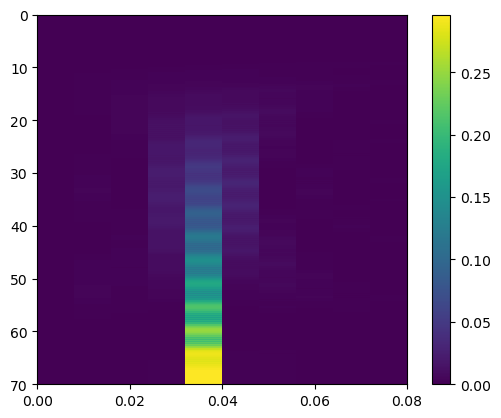

[5.936156125230483, 0.004528405237788752, 1, 60]
wm,d,f,t: [5.92616458e+00 2.71704314e-03 4.73238908e-01 1.08072606e+02]


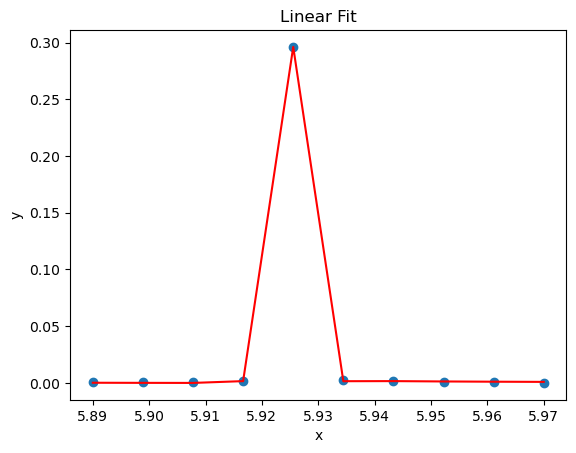

array([5.92616458e+00, 2.71704314e-03, 4.73238908e-01, 1.08072606e+02])

In [26]:
a=sideband(tupdown=10,TStep=1000,L=70,level=4,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:6-0.073,\
lambda t,args:5.7+0*0.056],sp=[1,1],amp=0.3)

b=a.scan_wd(5.93-0.04,5.93+0.04,10,-1,rho0=0)
# a.imshow(b)
# a.rho0
#tcost=2,*wdstep for GateL=50,

a.fit_w_mat(b,plot=True)


[5.936156125230483, 0.004189275789486268, 1, 140]
wm,d,f,t: [5.92826316e+00 3.52995627e-03 8.77371366e-01 3.11489923e+02]


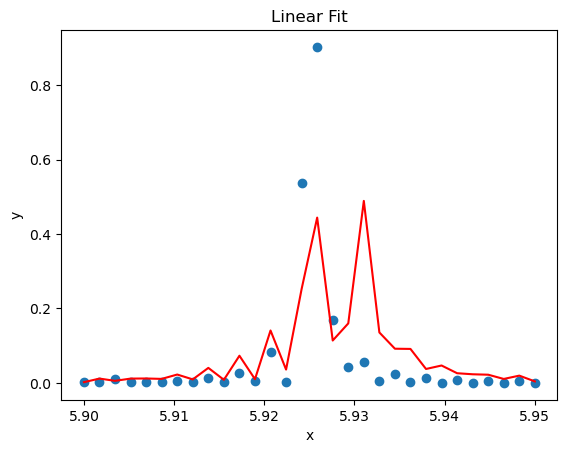

array([5.92826316e+00, 3.52995627e-03, 8.77371366e-01, 3.11489923e+02])

In [20]:
a=sideband(tupdown=10,TStep=1000,L=150,level=4,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:6-0.073,\
lambda t,args:5.7+0*0.056],sp=[1,1],amp=0.3)

# b=a.scan_wd(6-0.1,6-0.0,50,-1,rho0=0)
# a.wd[0](0,0)
# a.ks

# a.run(plot=True)

# shape(np.transpose(b[0][2][-1]))
a.fit_w_mat(b,plot=True)

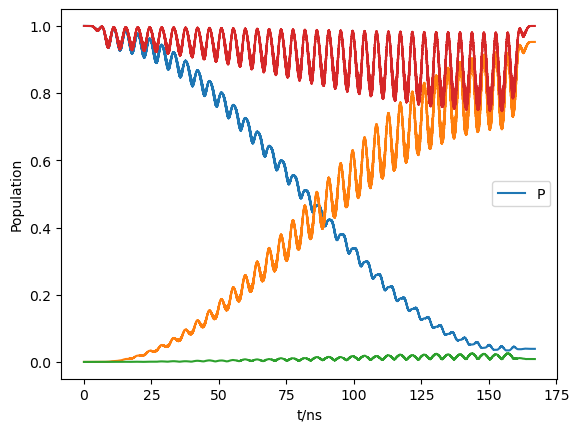

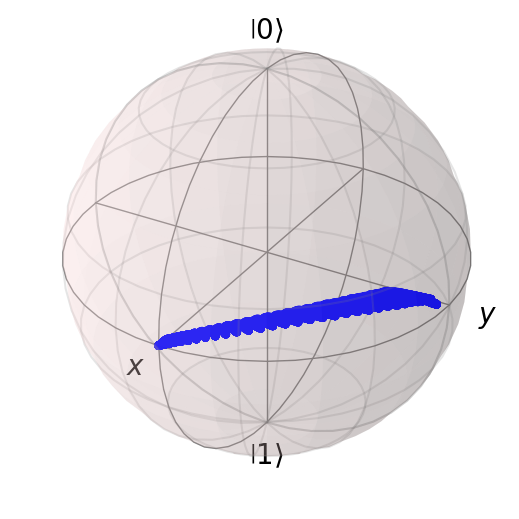

Result object with mesolve data.
--------------------------------
expect = True
num_expect = 3, num_collapse = 0

In [169]:
a=sideband(tupdown=10,TStep=10000,L=167,level=4,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:5.92616087,\
lambda t,args:5.7+0*0.056],sp=[1,1],amp=0.3)

# b=a.scan_wd(6-0.1,6-0.0,50,-1,rho0=0)
a.run(plot=True)

# shape(np.transpose(b[0][2][-1]))
# a.fit_w_mat(b,plot=True)

[0, 0.7302770646299412]


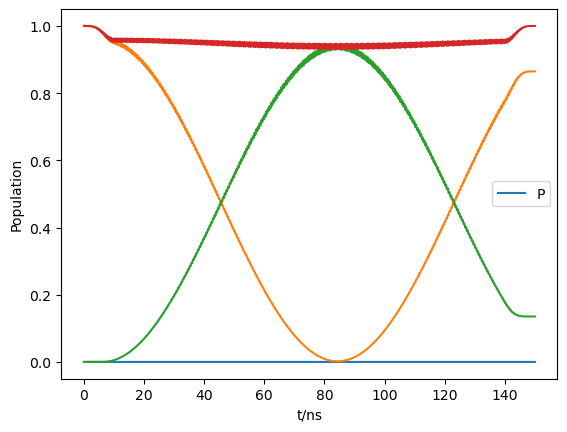

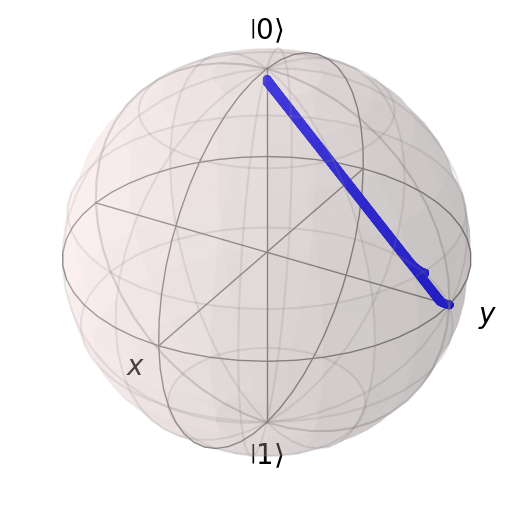

Result object with mesolve data.
--------------------------------
expect = True
num_expect = 3, num_collapse = 0

In [ ]:
a=sideband(tupdown=10,TStep=1000,L=150,level=4,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:6-0.0726,\
lambda t,args:5.7+1*0.0573],sp=[0,1],amp=0.3)

# b=a.scan_wd(5.7+0.056,5.7+0.060,10,1,1)
print(a.sp)
# a.imshow(b)
a.run(rho0=1,plot=True)

(3, 1000, 30)


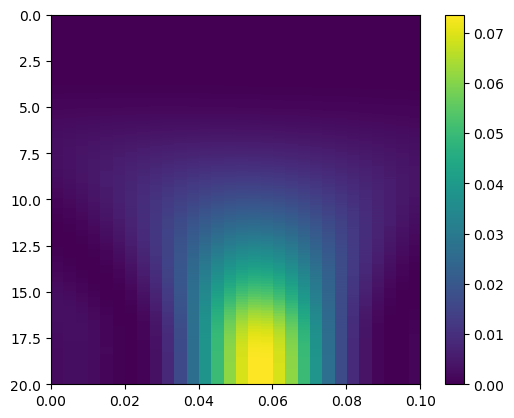

In [45]:
a=sideband(tupdown=5,TStep=1000,L=20,level=4,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:6-0.0726,\
lambda t,args:5.7+1*0.055],sp=[0,1],amp=0.3)


b=a.scan_wd(5.7+0.000,5.7+0.100,30,1,1)
# b=a.scan_wd(5.7+0.056,5.7+0.060,3,1,1)
# a.sp
# a.imshow(b)
# a.run(rho0=1,plot=True)


5.7743
5.9257


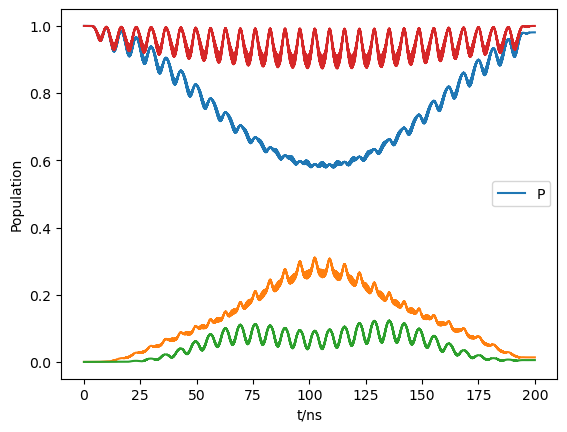

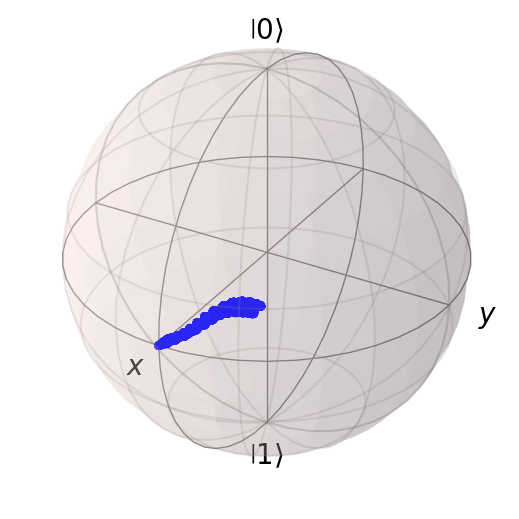

In [124]:
c=-0.000
d=0.0743
e=0.0743
# e=0.052
w=6-d-5.7-e
a=sideband(tupdown=10,TStep=10000,L=200,level=4,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:6-d+c*np.sin(w*2*np.pi*t),\
lambda t,args:5.7+e+c*np.sin(w*2*np.pi*t)],sp=[1,1],amp=0.3)
print(5.7+e)
print(6-d)
# a.sp
b=a.run(target=1,rho0=0,plot=True)

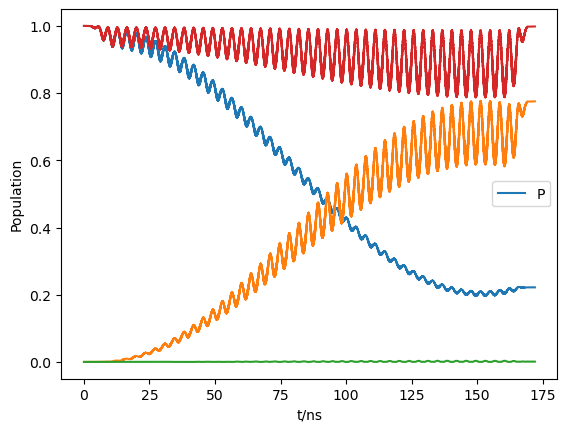

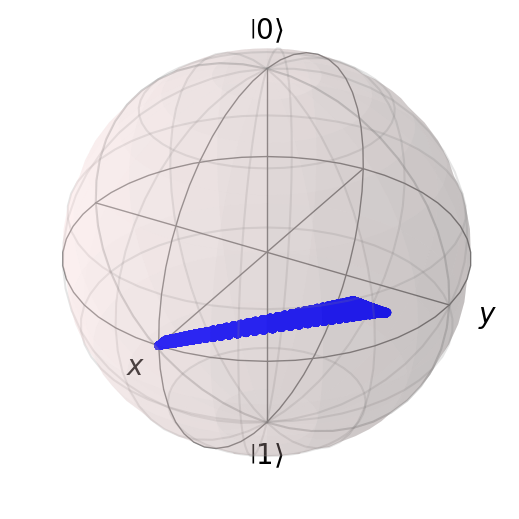

In [283]:
c=0.000
d=0.0743
# d=0.0
# w=6-d-5.7
a=sideband(tupdown=10,TStep=30000,L=172,level=4,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:6-0.0743-c+0*np.sin(w*2*np.pi*t),\
lambda t,args:5.7+0.5+0*0.0521+c+0*np.sin(w*2*np.pi*t)],sp=[1,0.8],amp=0.3)

b=a.run(target=1,rho0=0,plot=True)

#振荡约为0.28GHz

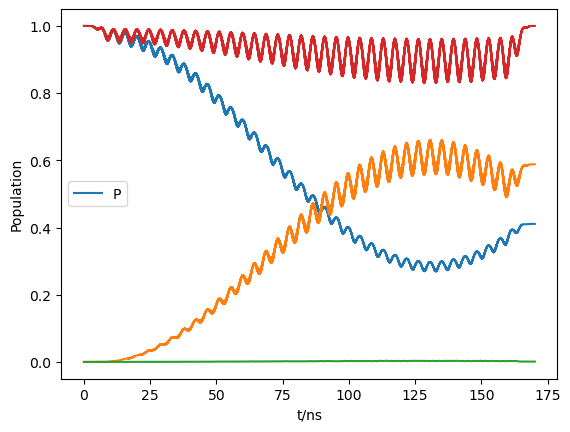

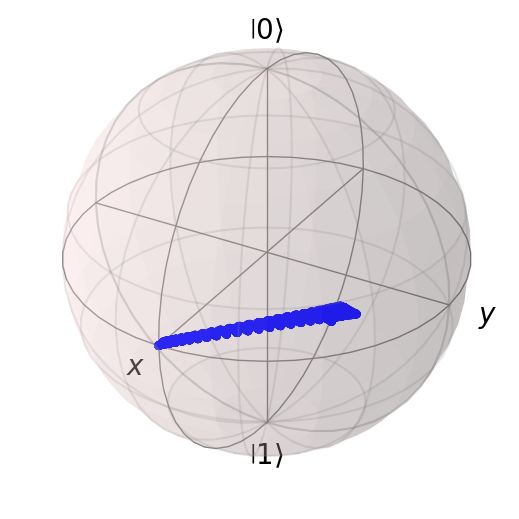

In [267]:
c=0.00
a=sideband(tupdown=10,TStep=10000,L=170.212,level=4,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:6-0.0742+c*np.sin(0.2258*2*np.pi*t),\
lambda t,args:5.7+c*np.sin(0.2258*2*np.pi*t)],sp=[1,0.8],amp=0.3)

b=a.run(target=1,rho0=0,plot=True)


In [390]:
a=sideband(tupdown=10,TStep=2000,L=160,level=4,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:6-0.0726,\
lambda t,args:5.7],sp=[1,0],amp=0.3)

b=a.run(target=1,rho0=0,plot=False)

#振荡约为0.28GHz

In [276]:
a=sideband(tupdown=10,TStep=1000,L=185,level=4,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:5.7+0.052],amp=0.15)

# b=a.run(target=2,rho0=1,plot=True)
a.ee

[0.0,
 4.937367087415759,
 6.966391523017491,
 9.787252820970334,
 11.872312250460967,
 13.632543265462653,
 14.580874967642382,
 16.688777500517997,
 18.535608732323908,
 19.80515670828436,
 21.34839508305961,
 23.368333937408,
 24.967886423950794,
 27.878304899489603,
 29.952130476566026,
 34.36788811394516]

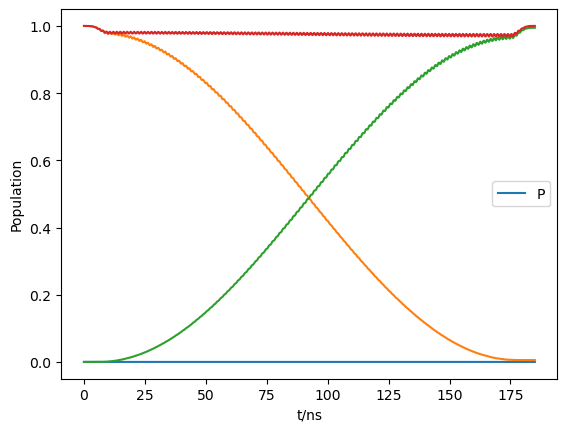

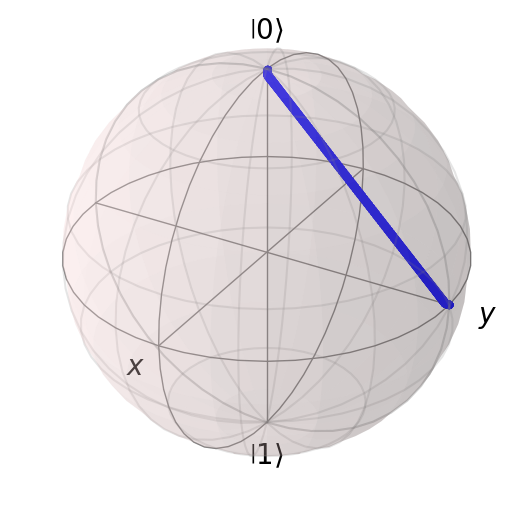

In [344]:
a=sideband(tupdown=10,TStep=1000,L=185,level=4,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:5.7+0.0521],amp=0.15)

b=a.run(target=2,rho0=1,plot=True)
#振荡周期约为1GHZ


In [2]:
1/(0.3/2*0.5*0.09*1)

148.14814814814815

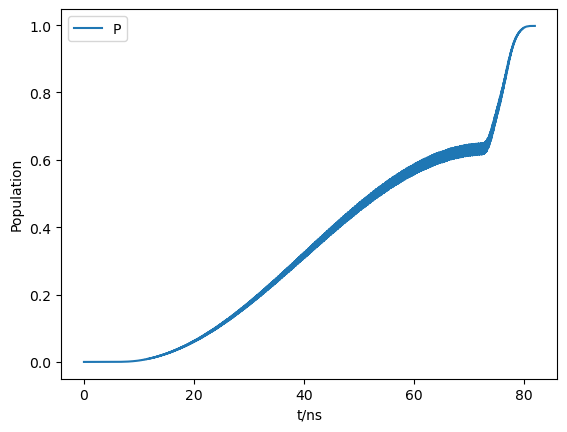

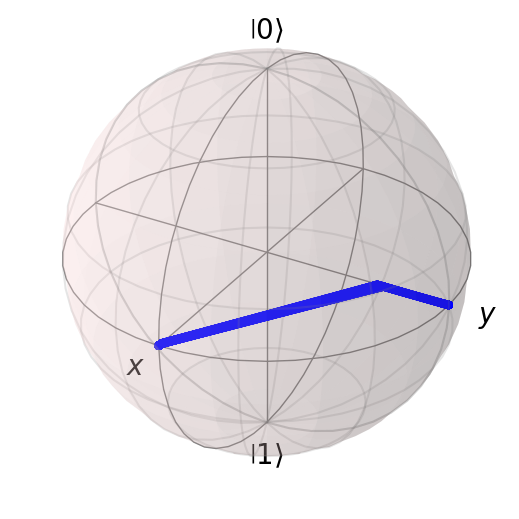

In [113]:
a=sideband(tupdown=10,TStep=5000,L=82,level=6,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:6-0.14],amp=0.3)

b=a.run(target=1,rho0=0,plot=True)

(3, 500, 10)


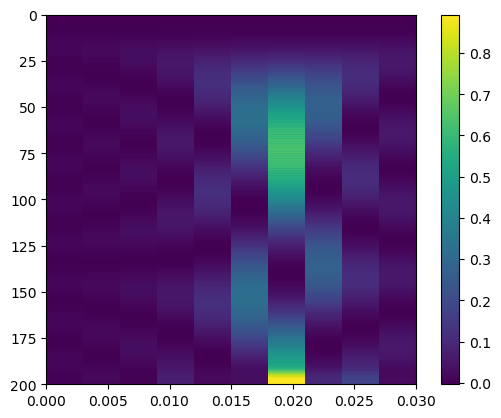

In [193]:
a=sideband(tupdown=10,TStep=500,L=200,level=6,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:6-0.0126],amp=0.3)

b=a.scan_wd(6-0.16,6-0.13,10,0)
a.imshow(b)

#tcost=2,*wdstep for GateL=50,

(3, 2000, 10)


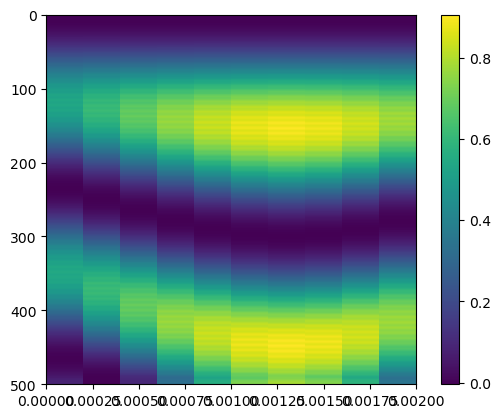

In [110]:
a=sideband(dic={'wd':[lambda t,args:6.013]},tupdown=10,TStep=2000,L=500,level=4,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:6-0.0126],amp=0.3)

b=a.scan_wd(6-0.074,6-0.072,10,0)
a.imshow(b)

#tcost=2,*wdstep for GateL=50,

(3, 2000, 7)


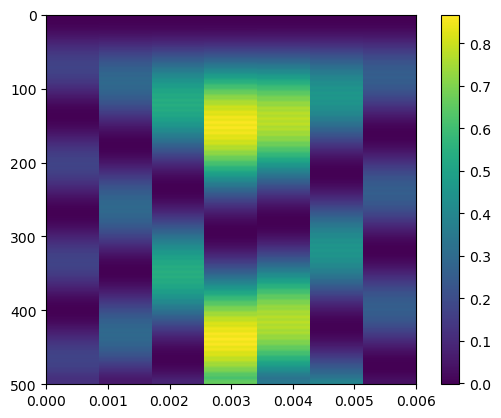

In [212]:
a=sideband(dic={'wd':[lambda t,args:6.013]},tupdown=10,TStep=2000,L=500,level=4,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:6-0.0126],amp=0.3)

b=a.scan_wd(6-0.076,6-0.07,7,0)
a.imshow(b)

#tcost=2,*wdstep for GateL=50,

(3, 1000, 100)


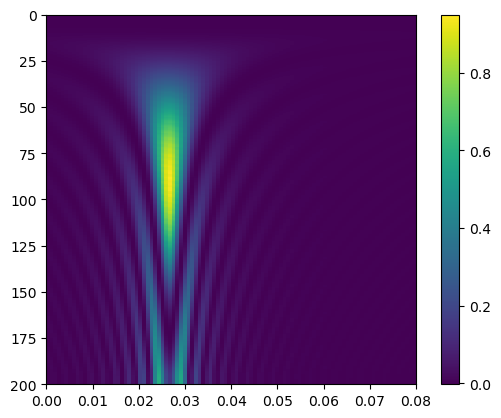

In [11]:
a=sideband(tupdown=10,TStep=1000,L=200,level=4,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:5.7+0.068],amp=0.212132)

b=a.scan_wd(5.73,5.81,100,1)
a.imshow(b,2)

(3, 1000, 100)


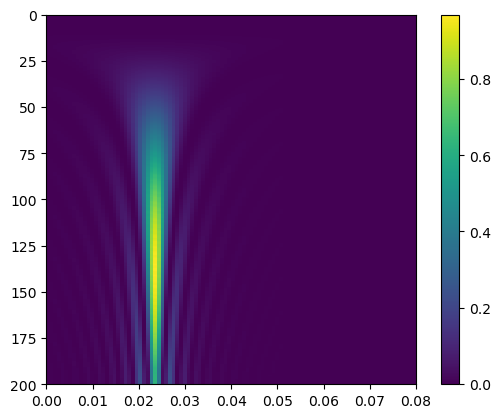

In [224]:
a=sideband(tupdown=10,TStep=1000,L=200,level=4,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:5.7+0.068],amp=0.17)

b=a.scan_wd(5.73,5.81,100,1)
a.imshow(b,2)

(3, 1000, 100)


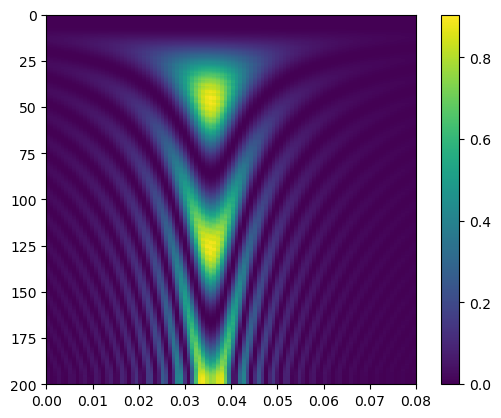

In [203]:
a=sideband(tupdown=10,TStep=1000,L=200,level=4,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:5.7+0.068],amp=0.3)

b=a.scan_wd(5.73,5.81,100,1)
a.imshow(b,2)

#3*

6.926467853355735

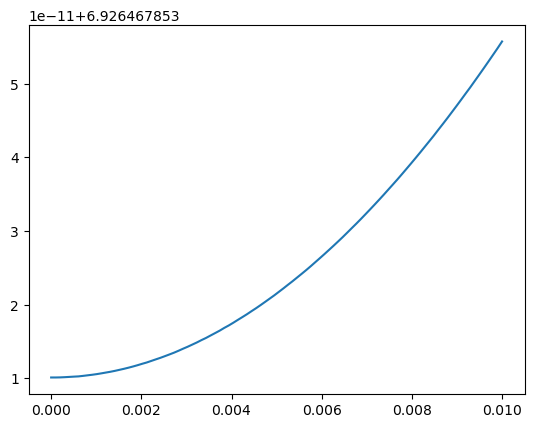

In [243]:
a=sideband(tupdown=10,TStep=1000,L=100,level=4,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:6.01],amp=0.3)

a.energyLevel(2,0.01)

6.00487897102016

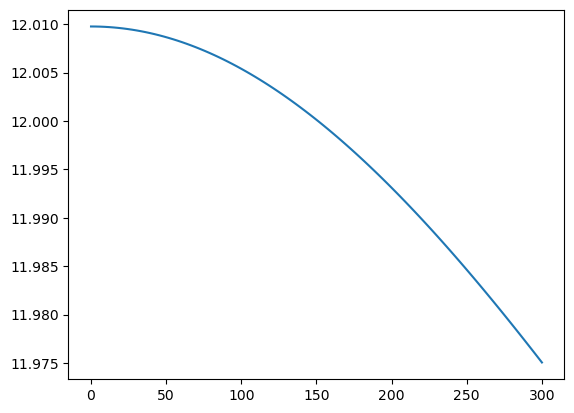

In [21]:
a=sideband(dic={'wd':[lambda t,args:6.013]},tupdown=10,TStep=1000,L=100,level=3,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:6.01],amp=0.3)

a.energyLevel(target=4)/2


In [ ]:
a=sideband(dic={'wd':[lambda t,args:6.013]},tupdown=10,TStep=1000,L=100,level=3,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:6.01],amp=0.3)
#w11/2=5.9875=6-0.0125
b=a.scan_wd(5.7,6.3,100,0)
a.imshow(b,1)

(3, 10000, 100)


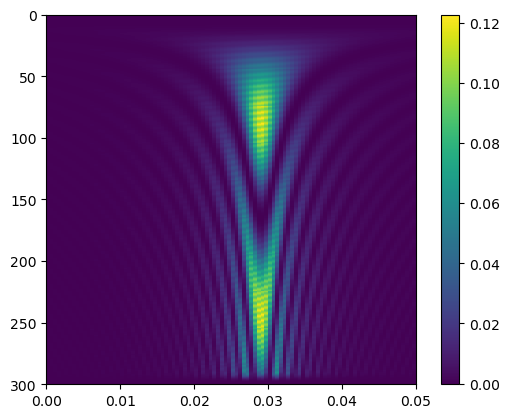

In [195]:
a=sideband(dic={'wd':[lambda t,args:6.013]},tupdown=10,TStep=10000,L=300,level=3,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:6.01],amp=0.3)
#w11/2=5.9875=6-0.0125
b=a.scan_wd(6.25,6.3,100,0)
a.imshow(b,1)

(3, 2000, 100)


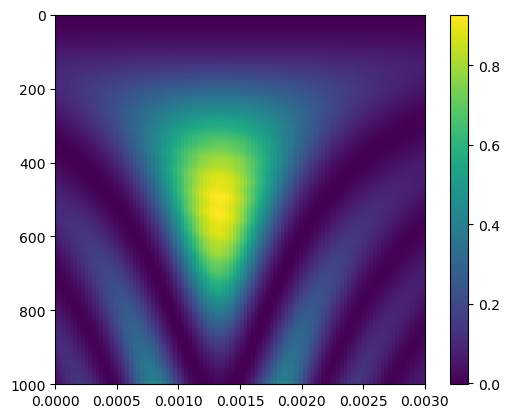

In [191]:
a=sideband(dic={'wd':[lambda t,args:6.013]},tupdown=10,TStep=2000,L=1000,level=3,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:6-0.0126],amp=0.3)

b=a.scan_wd(6-0.014,6-0.011,100,0)
a.imshow(b)

#tcost=7.4,13.3*wdstep for GateL=500,1000


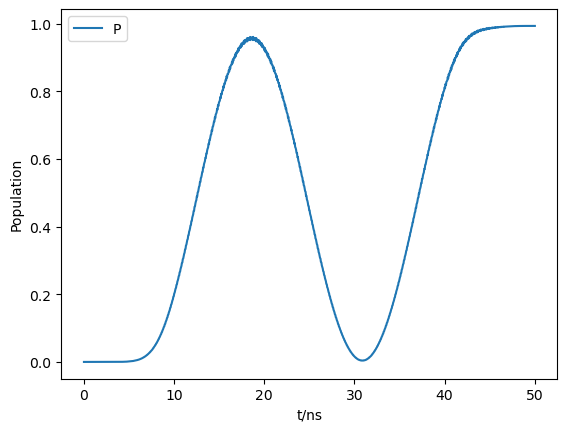

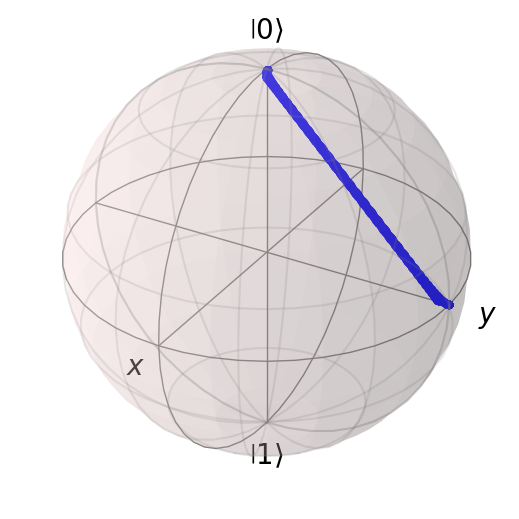

In [181]:
a=sideband(dic={'wd':[lambda t,args:6.013]},tupdown=10,TStep=1000,L=50,level=3,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:5.7+0.068],amp=0.3)

b=a.run(target=2,rho0=1,plot=True)


(3, 1000, 9)


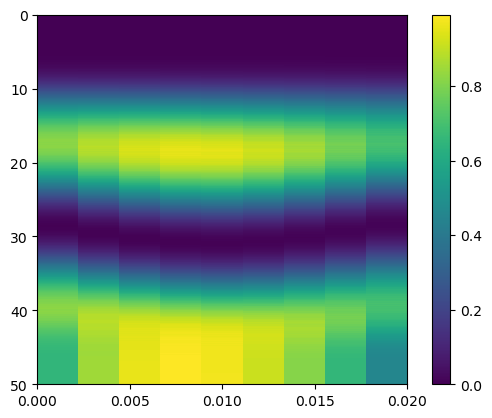

In [162]:
a=sideband(dic={'wd':[lambda t,args:6.013]},tupdown=10,TStep=1000,L=50,level=3,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:5.7+0.068],amp=0.3)

b=a.scan_wd(5.7+0.06,5.7+0.08,9,1)
a.imshow(b,2)



(3, 1000, 4)


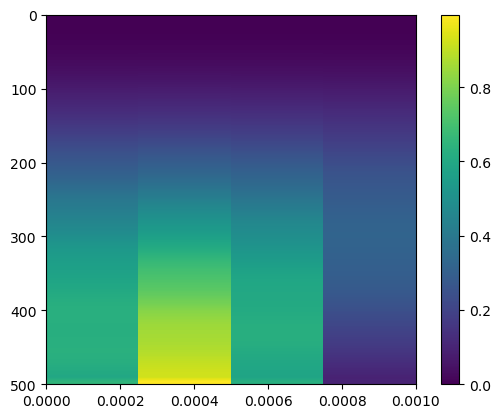

In [98]:
a=sideband(dic={'wd':[lambda t,args:6.013]},tupdown=10,TStep=1000,L=500,level=3,\
g=[300],w=[7,5],yita=[500,100],wd=[lambda t,args:6.01],amp=0.3)

b=a.scan_wd(5.9870,5.988,4,0)
a.imshow(b)


In [99]:
# li=list(a.run())
# # a.envelope(1.1,'x')#(-1,1)
# # map(li)
# # a.Drive[1](1,'sb')
# # b=map(a.envelope,li,li)
# b=map(a.DS,li,li)
# # a.DS(1,0)
# b=list(b)
# # # # b
# fig,ax=plt.subplots()
# ax.plot(li,b)

In [100]:
# print('Sideband don\'t ')
# q=lambda t:t
# len([1])
# print(list(range(1)))
list(range(len([0])))

[0]

In [101]:
# class ccc:
#     a=1
#     b=2
d={'a':7,'b':'a'}
d.balues
# # for i in d:
#     # print(d[i])
# p='a'
# c=ccc()
# if hasattr(c,p):
#     setattr(ccc,p,'bbb')
# #
# warnings.warn("hello")

AttributeError: 'dict' object has no attribute 'balues'

In [ ]:
a=destroy(7)
ad=a.dag()
a*a*0.1/2
# b=(ad+a)**4-(a*a*a*a+4*ad*a*a*a+6*ad*ad*a*a+4*ad*ad*ad*a+ad*ad*ad*ad+6*(a+ad)**2-3)
# Qobj(b)#[:5,:5])
# (ad+a)**3-(a*a*a+3*ad*a*a+3*ad*ad*a+ad*ad*ad+3*(ad+a))
# (ad+a)**2-(a*a+2*ad*a+ad*ad+1)
# Qobj(a[:3,:3])
# h=(13+3)*ad*a-3/12*((a+ad)**4)+0.75#-(a*a*a*a+ad*ad*ad*ad+4*ad*ad*ad*a+4*ad*a*a*a+6*ad*ad*a*a+6*(a+ad)**2-3)
# h.eigenenergies()
# h
# ad*ad*a*a
# a+1
# -(a+ad)**4/12+ad*a*(1)+0.25*qeye(5)
# s=-(tensor(a,a)-tensor(ad,ad))
# f=tensor(ad*a*a,ad*ad*ad*a*a*a*a)
# f=f+f.dag()
# t=(f*s-s*f)*0+((tensor(ad*a,a*ad*ad*ad*a*a*a*a)*2+tensor(ad*a*a*a,ad*ad*ad*a*a*a)*4+tensor(a*a,ad*ad*ad*ad*a*a*a*a)*1+tensor(ad*a*a*ad,ad*ad*a*a*a*a)*3)\
# +(tensor(ad*a,a*ad*ad*ad*a*a*a*a)*2+tensor(ad*a*a*a,ad*ad*ad*a*a*a)*4+tensor(a*a,ad*ad*ad*ad*a*a*a*a)*1+tensor(ad*a*a*ad,ad*ad*a*a*a*a)*3).dag())
# print(list(t))
# ad*ad*ad*a
# tensor(a+ad,a+ad)

Quantum object: dims = [[7], [7]], shape = (7, 7), type = oper, isherm = False
Qobj data =
[[0.         0.         0.07071068 0.         0.         0.
  0.        ]
 [0.         0.         0.         0.12247449 0.         0.
  0.        ]
 [0.         0.         0.         0.         0.17320508 0.
  0.        ]
 [0.         0.         0.         0.         0.         0.2236068
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.27386128]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]]

In [ ]:
f=lambda t:1 if t>0 else\
2 if t<0 else\
3 if t==0 else 0
f()


TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
sp=sigmap()
sm=sigmam()
I=qeye(3)
# tensor(sp,a)*tensor(sm,ad)-tensor(sm,ad)*tensor(sp,a)-(tensor(sigmaz(),ad*a)+0.5*tensor(sigmaz()+1,I))
tensor(ad,a)*tensor(a,ad)-tensor(a,ad)*tensor(ad,a)-(tensor(ad*a,ad*a)+0.5*tensor(ad*a+1,I))

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[-0.5  0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -1.5  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -2.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -2.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -7.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.5  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -5.5]]

In [ ]:
sz=sigmaz()
sz-(sp*sm-sm*sp)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 0.]]